# Kristin Meier
# Hw 3

## Excercise 2 - Web Scraping

Rewrite the scraping sample done in the class – jail house inmates – not to use RegEx, instead use BeautifulSoap library.

[Jail House Inmates](https://report.boonecountymo.org/mrcjava/servlet/SH01_MP.I00290s)

**Helpful Links**
- [Beginner's guide to web scraping](https://www.analyticsvidhya.com/blog/2015/10/beginner-guide-web-scraping-beautiful-soup-python/)
- [HTML Tagging](http://www.w3schools.com/TAgs/tag_td.asp)
- [Beautiful Soup Help](https://web.stanford.edu/~zlotnick/TextAsData/Web_Scraping_with_Beautiful_Soup.html)

In [149]:
url = 'http://www.showmeboone.com/sheriff/JailResidents/JailResidents.asp'


In [150]:
from bs4 import BeautifulSoup

"You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup."

In [151]:
import urllib.request #import the library used to query a website
wiki = url1 #specify the url
page = urllib.request.urlopen(wiki) # Query the website and return the html to the variable 'page'

In [178]:
soup = BeautifulSoup(page,"lxml")
#soup.prettify

### Finding the table to look at

In [126]:
all_tables = soup.find_all('table') # exploring tables, find table I need
bigtable = soup.find('table',class_='collapse shadow BCSDTable') # bs4.element.Tag

### Loop through rows of table data to get entries

In [127]:
# Initiate Lists
lname = []
fname = []
mname = []
sex = []
race = []
age = []
city = []
state = []

In [128]:
for row in bigtable.findAll("tr"): # each row of table
    cells = row.findAll("td") # table data
    if len(cells) == 9: # exclude table headers and other info
        # index 1 - 8
        lname.append(cells[1].string)
        fname.append(cells[2].string)
        mname.append(cells[3].string)
        sex.append(cells[4].string)
        race.append(cells[5].string)
        age.append(cells[6].string)
        city.append(cells[7].string)
        state.append(cells[8].string)

### Create pandas dataframe

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [130]:
prisoners = pd.DataFrame(
    {'lname': lname,
     'fname': fname,
     'mname': mname,
     'sex': sex,
     'race': race,
     'age': age,
     'city': city,
     'state': state
    })

In [131]:
# convert age to numeric for averages
prisoners.age = pd.to_numeric(prisoners.age)
# prisoners.dtypes
prisoners.head()

,age,city,fname,lname,mname,race,sex,state
0,22,COLUMBIA,BENJAMIN,ALEXANDER,FRANKLIN,B,M,MO
1,30,ST. LOUIS,ANDRE,ANDERSON,LAMONTE,B,M,MO
2,25,JEFFERSON CITY,BRAYAN,ARTEAGA,OSIRIS-CACHO,H,M,MO
3,20,PILOT GROVE,ASHLEY,AUBREY,SUZANNE,B,F,MO
4,33,KANSAS CITY,KAY,AUSTIN,CEE,W,F,MO


In [132]:
#GROUP BY
prisoners.groupby('sex').count()[['fname']]

,fname
sex,
F,10
M,40


In [135]:
prisoners.groupby('city').count()[['fname']]

,fname
city,
CENTRALIA,1
COLUMBIA,35
FORDYCE,1
FULTON,1
HALLSVILLE,1
HEDRICK,1
JACKSON,1
JEFFERSON CITY,2
KANSAS CITY,1


In [146]:
prisoners[['age']].mean()

age    33.2
dtype: float64

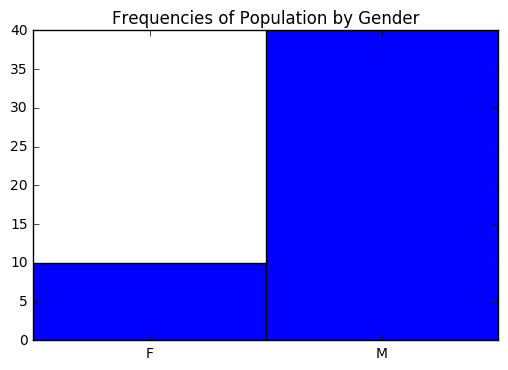

In [177]:
# Male and female frequencies and proportions
a = prisoners.groupby('sex').count()[['fname']]
tot = len(prisoners)
a['prop'] = a['fname']/tot

#%pylab inline
alphab = [a.index[0],a.index[1]] # dynamic labels 
proportions = a['prop'] # proportion column
frequencies = a['fname'] # frequency column

pos = np.arange(len(alphab))
width = 1.0     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(alphab)

plt.bar(pos, proportions, width, color='r')
plt.title("Proportions of Population by Gender")

plt.bar(pos, frequencies, width, color='b')
plt.title("Frequencies of Population by Gender")

plt.show()

### Scraping from the next page

Links
- [stack overfow](http://stackoverflow.com/questions/26497722/scrape-multiple-pages-with-beautifulsoup-and-python)
